<a href="https://colab.research.google.com/github/Hannah1011/llm-response-clustering/blob/main/1_elbow_point_for_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
- 파일명 : elbow_point_for_cluster.ipynb
- 목적:
    -  K-Means 클러스터링을 위한 최적의 클러스터 개수를 결정하기 위해 엘보 메서드 계산
'''

import numpy as np
import pandas as pd
from ast import literal_eval
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


datafile_path = "/content/human_feedback_embedding_large.csv"
df = pd.read_csv(datafile_path)

df["embedding"] = df.embedding.apply(literal_eval).apply(np.array)
matrix = np.vstack(df.embedding.values)
matrix.shape

(87, 3072)

In [6]:
#정규화 없이 kmeans
distortions = []
K = range(1, 50)  # Test cluster numbers : from 1 to 50
for k in K:
  km = KMeans(n_clusters=k, init='k-means++', n_init= 15, max_iter=400, random_state=0)
  km.fit(matrix)
  distortions.append(km.inertia_)

In [7]:
# 정규화 사용한 kmeans
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

distortions_regularize = []
K = range(1, 50)  # Test cluster numbers : from 1 to 50
for k in K:
  km_regularize = KMeans(n_clusters=k, init='k-means++', n_init= 15, max_iter=400, random_state=0)
  km_regularize.fit(matrix_scaled)
  distortions_regularize.append(km_regularize.inertia_)

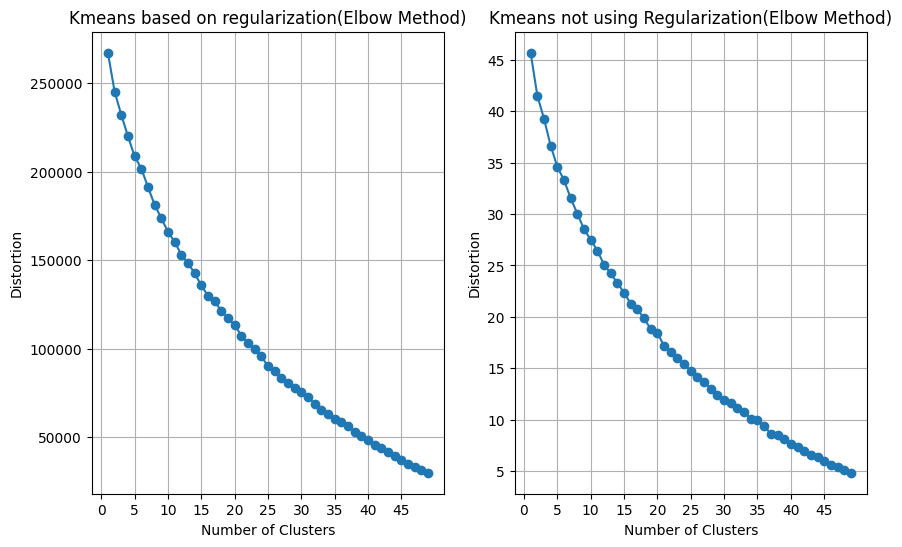

In [13]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)

plt.plot(K, distortions_regularize, marker="o")
plt.title("Kmeans based on regularization(Elbow Method)")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.xticks(np.arange(0,49, 5))
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(K, distortions, marker="o")
plt.title("Kmeans not using Regularization(Elbow Method)")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.xticks(np.arange(0,49, 5))
plt.grid(True)
plt.show()